## CNN - Project - Part 3

### 1. Importing the data and analysing the dimensions of the data.

In [ ]:
# Import oxflower17 images 

# Data Library
import tflearn.datasets.oxflower17 as oxflower17   

In [2]:
# Getting predictor and Target split 

x, y = oxflower17.load_data()

### 2. Preprocessing the data

In [3]:
# Getting total number of images 

import numpy as np
print(' Total number of images : ', x.shape[0])

 Total number of images :  1360


In [4]:
# Getting the shape and size of each image 

print(' Image shape : ', x.shape[1:3])

 Image shape :  (224, 224)


In [5]:
# Getting the number of channels of each image 

print(' Channel : ', x.shape[3])

 Channel :  3


In [6]:
# Printing the image count, shape and channel in one array 

print(' Image as 4d array : ', x.shape)

 Image as 4d array :  (1360, 224, 224, 3)


In [7]:
# Getting target classes of the images 

print(' Target class count : ', y.shape)

 Target class count :  (1360,)


In [8]:
# Getting total number of unique target classes of the images 

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  17
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [9]:
# Getting target balancing within from all the classes 

length=len(y)
Zero=One= Two= Three= Four= Five= Six= Seven= Eight= Nine= Ten= 0
Eleven= Twelve= Thirteen= Fourteen= Fifteen= Sixteen = 0

for i in range(length):
    if y[i]==0:
        Zero=Zero+1
    elif y[i]==1:
        One=One+1
    elif y[i]==2:
        Two=Two+1
    elif y[i]==3:
        Three=Three+1
    elif y[i]==4:
        Four=Four+1
    elif y[i]==5:
        Five=Five+1
    elif y[i]==6:
        Six=Six+1
    elif y[i]==7:
        Seven=Seven+1
    elif y[i]==8:
        Eight=Eight+1
    elif y[i]==9:
        Nine=Nine+1
    elif y[i]==10:
        Ten=Ten+1
    elif y[i]==11:
        Eleven=Eleven+1
    elif y[i]==12:
        Twelve=Twelve+1
    elif y[i]==13:
        Thirteen=Thirteen+1
    elif y[i]==14:
        Fourteen=Fourteen+1
    elif y[i]==15:
        Fifteen=Fifteen+1
    elif y[i]==16:
        Sixteen=Sixteen+1
  
print("Class Balancing:\n", 
      "\n0:",Zero,
      "\n1:",One, 
      "\n2:",Two, 
      "\n3:",Three, 
      "\n4:",Four, 
      "\n5:",Five, 
      "\n6:",Six, 
      "\n7:",Seven, 
      "\n8:",Eight, 
      "\n9:",Nine, 
      "\n10:",Ten, 
      "\n11:",Eleven, 
      "\n12:",Twelve, 
      "\n13:",Thirteen, 
      "\n14:",Fourteen, 
      "\n15:",Fifteen, 
      "\n16:",Sixteen)

Class Balancing:
 
0: 80 
1: 80 
2: 80 
3: 80 
4: 80 
5: 80 
6: 80 
7: 80 
8: 80 
9: 80 
10: 80 
11: 80 
12: 80 
13: 80 
14: 80 
15: 80 
16: 80


In [10]:
# Targeting on hot coding 

from keras.utils import to_categorical # Library

Y_one_hot = to_categorical(y)
Y_one_hot.shape

Using TensorFlow backend.


(1360, 17)

In [11]:
# Splitting the data into training, validation and testing 


from sklearn.model_selection import train_test_split
t_X,test_X,t_Y,test_Y = train_test_split(x, Y_one_hot, test_size=0.2, random_state=5)

# Test Train split
from sklearn.model_selection import train_test_split
train_X,valid_X,train_Y,valid_Y = train_test_split(t_X, t_Y, test_size=0.2, random_state=5)

In [12]:
# Converting all images to float 32 format  

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
valid_X = valid_X.astype('float32')


In [13]:
# Normalizing all images  

train_X = train_X / 255.
test_X = test_X / 255.
valid_X = valid_X / 255.

In [14]:
# Printing final shape and size of training, validation and testing data  

print(' Train data : ', t_X.shape, t_Y.shape)

print(' Train data : ', train_X.shape, train_Y.shape)

print(' Validation data : ', valid_X.shape, valid_Y.shape)

print(' Test data : ', test_X.shape, test_Y.shape)

 Train data :  (1088, 224, 224, 3) (1088, 17)
 Train data :  (870, 224, 224, 3) (870, 17)
 Validation data :  (218, 224, 224, 3) (218, 17)
 Test data :  (272, 224, 224, 3) (272, 17)


### 3. Data visualisation

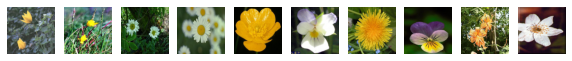

label for each of the above image: [14 14  2  2  6  8  4  8 13  7]


In [15]:
# Displaying the first 10 images in the dataset and their labels 

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y[0:10]))

Image width: 689
Image height: 500


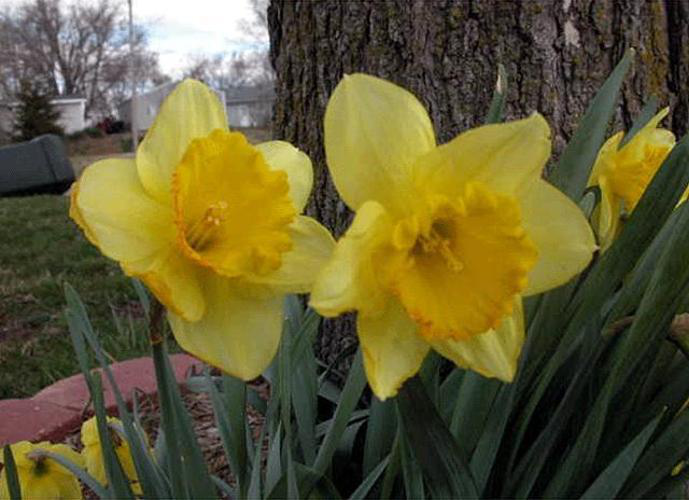

In [16]:
# Displaying the first image from class = 0 

from PIL import Image  
  
Image_name = "image_0001.jpg"   
with Image.open(Image_name) as image: 
    width, height = image.size 

print("Image width:",width)    

print("Image height:",height)

Image.open(Image_name)

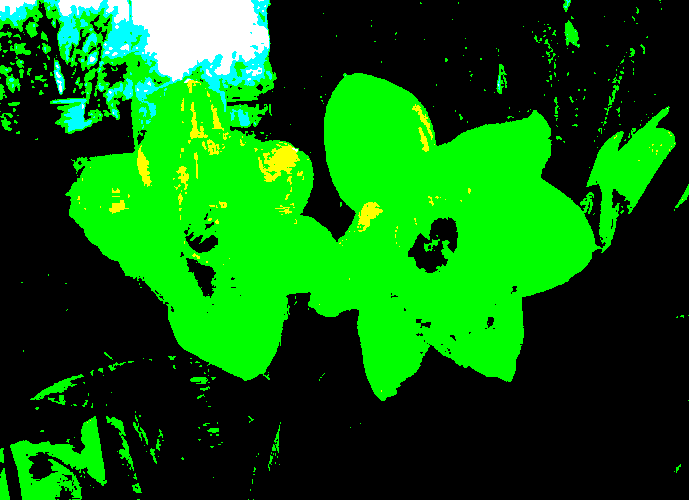

In [17]:
# Displaying and saving the first image from class = 0 and changing the pixel value as per the following logic 
        # 1. if red pixel > 200 then chage the pixel value to 255 else make it 0
        # 2. if green pixel > 100 then chage the pixel value to 255  else make it 0
        # 3. if blue pixel > 150 then chage the pixel value to 255 else make it 0

from PIL import Image

# Open an Image
def open_image(path):
  newImage = Image.open(path)
  return newImage

# Save Image
def save_image(image, path):
  image.save(path, 'png')


# Create a new image with the given size
def create_image(i, j):
  image = Image.new("RGB", (i, j), "white")
  return image


# Get the pixel from the given image
def get_pixel(image, i, j):
  # Inside image bounds?
  width, height = image.size
  if i > width or j > height:
    return None

  # Get Pixel
  pixel = image.getpixel((i, j))
  return pixel        
        
        
        
# Create a COLOR version of the image
def convert_grayscale(image):
  # Get size
  width, height = image.size

  # Create new Image and a Pixel Map
  new = create_image(width, height)
  pixels = new.load()

  # Transform to grayscale
  for i in range(width):
    for j in range(height):
      # Get Pixel
      pixel = get_pixel(image, i, j)

      # Get R, G, B values (This are int from 0 to 255)
      red =   pixel[0]
      green = pixel[1]
      blue =  pixel[2]

      # Transform to primary
      if red > 200:
        red = 255
      else:
        red = 0
      if green > 100:
        green = 255
      else:
        green = 0
      if blue > 150:
        blue = 255
      else:
        blue = 0

      # Set Pixel in new image
      pixels[i, j] = (int(red), int(green), int(blue))

  # Return new image
  return new

original = open_image(Image_name)
new = convert_grayscale(original)
save_image(new, 'Transformed.png')
Image.open('Transformed.png')

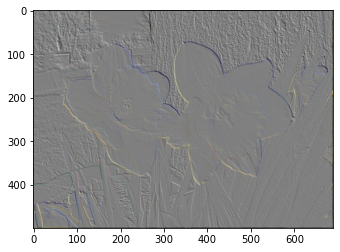

In [18]:
# Applying the edge detection or Blur or Emboss filter on the image 


#Importing required image modules
from PIL import Image, ImageFilter

#Importing all the enhancement filter from pillow
from PIL.ImageFilter import ( BLUR, 
                             CONTOUR, 
                             DETAIL, 
                             EDGE_ENHANCE, 
                             EDGE_ENHANCE_MORE,
                             EMBOSS, 
                             FIND_EDGES, 
                             SMOOTH, 
                             SMOOTH_MORE, 
                             SHARPEN )
#Creating image object
img = Image.open(Image_name)
#Applying the blur filter
img1 = img.filter(EMBOSS)

plt.imshow(img1)
plt.show()

### 4. Training, tuning and testing image classifier model

In [19]:
# Building a classifier 


# Preprocessing the data - Splitting into training, validation and testing 

from sklearn.model_selection import train_test_split
ML_TRAIN_X,ML_TEST_X,ML_TRAIN_Y,ML_TEST_Y = train_test_split(x, y, test_size=0.2, random_state=5)

# Test Train split
from sklearn.model_selection import train_test_split
ML_Train_X,ML_Valid_X,ML_Train_Y,ML_Valid_Y = train_test_split(ML_TRAIN_X, ML_TRAIN_Y, test_size=0.2, random_state=5)


# Flattenig the image data 

# Training data
x_train_ML = []
for i in range(870):
    x_train_ML.append(ML_Train_X[i,:].flatten())

# Testing data
x_test_ML = []
for i in range(218):
    x_test_ML.append(ML_Valid_X[i,:].flatten())


# Print data lengths

print("\n Training data:",len(x_train_ML))
print("\n Training Target data:",len(ML_Train_Y))
print("\n Testing data:",len(x_test_ML))
print("\n Testing Target data:",len(ML_Valid_Y))


# Random Forest

# Importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)
model_RF.fit(x_train_ML, ML_Train_Y)

# Accuracy
pred_RF = model_RF.predict(x_test_ML)
RF_Train = model_RF.score(x_train_ML, ML_Train_Y)
RF_Test = accuracy_score(ML_Valid_Y, pred_RF)   

# Output
print("\nRandom Forest: Train Accuracy:",RF_Train)
print("\nRandom Forest: Test Accuracy:",RF_Test)


# ADA Boosting

# Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Model
model = AdaBoostClassifier( base_estimator=None,    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,
                            learning_rate=1.0,
                            algorithm='SAMME.R',     # try using SVC() as base estimator above
                            random_state=None,)
model_AB = model.fit(x_train_ML, ML_Train_Y)

# Accuracy
AB_Train = model_AB.score(x_train_ML, ML_Train_Y)
pred_AB =model_AB.predict(x_test_ML)
acc_AB = accuracy_score(ML_Valid_Y, pred_RF)

print("\nADA Boosting: Train Accuracy:",AB_Train)
print("\nADA Boosting: Test Accuracy:",acc_AB)


 Training data: 870

 Training Target data: 870

 Testing data: 218

 Testing Target data: 218

Random Forest: Train Accuracy: 1.0

Random Forest: Test Accuracy: 0.46788990825688076

ADA Boosting: Train Accuracy: 0.16206896551724137

ADA Boosting: Test Accuracy: 0.46788990825688076


In [ ]:
# Using NN technique to build a classifier 

NN_train_X = ML_Train_X.reshape(ML_Train_X.shape[0], 150528)
NN_test_X = ML_Valid_X.reshape(ML_Valid_X.shape[0], 150528)

# # normalizing inputs from 0-255 to 0-1
NN_train_X = NN_train_X / 255.0
NN_test_X = NN_test_X / 255.0

print('Training set', NN_train_X.shape, train_Y.shape)
print('Test set', NN_test_X.shape, test_Y.shape)


from keras.utils import np_utils
# one hot encoding outputs
NN_y_train = np_utils.to_categorical(ML_Train_Y)
NN_y_test = np_utils.to_categorical(ML_Valid_Y)

# number of classes
num_classes = NN_y_test.shape[1]


### defining model
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense



def nn_model():
    # create model
    model = Sequential()  
    model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer
    
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compiling model
    sgd = optimizers.Adam(lr=1e-3)
    model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model

# building the model
model = nn_model()

# Fitting the model
model.fit(NN_train_X, NN_y_train, validation_data=(NN_test_X, NN_y_test), epochs=10, batch_size=200, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 86528)             0         
__________

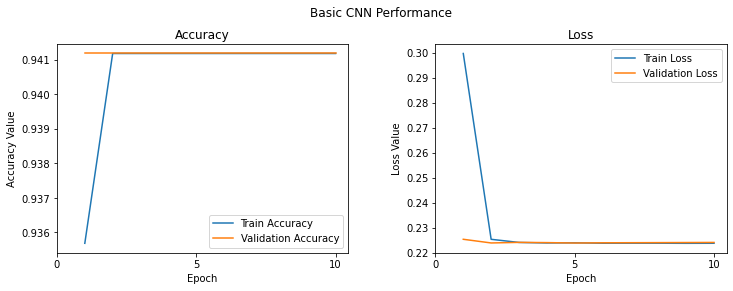

In [22]:
# Using CNN technique to build a classifier 

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


batch_size = 30
num_classes = 17
epochs = 10
input_shape = (224, 224, 3)

CNN_model = Sequential()

CNN_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Flatten())
CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(Dense(17, activation='softmax')) 


CNN_model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['accuracy'])

CNN_model.summary()


# Importing Library
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.3, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_X, train_Y, batch_size=30)
val_generator = val_datagen.flow(valid_X,valid_Y, batch_size=30)


history = CNN_model.fit_generator(train_generator, 
                                  steps_per_epoch=10, 
                                  epochs=epochs,
                                  validation_data=val_generator, 
                                  validation_steps=50, 
                                  verbose=1)


# Plots

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))  
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_10 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_11 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 256)         0         
__________

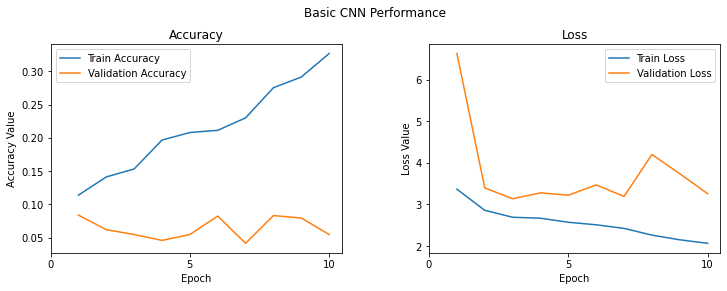

In [24]:
# Using CNN Transfer Learning technique to build a classifier 

from keras.models import Sequential
CNN_Alexnet_model = Sequential()

# 1st Convolutional Layer
CNN_Alexnet_model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
CNN_Alexnet_model.add(Activation('relu'))
# Pooling 
CNN_Alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
CNN_Alexnet_model.add(BatchNormalization())

# 2nd Convolutional Layer
CNN_Alexnet_model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
CNN_Alexnet_model.add(Activation('relu'))
# Pooling
CNN_Alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
CNN_Alexnet_model.add(BatchNormalization())

# 3rd Convolutional Layer
CNN_Alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
CNN_Alexnet_model.add(Activation('relu'))
# Batch Normalisation
CNN_Alexnet_model.add(BatchNormalization())

# 4th Convolutional Layer
CNN_Alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
CNN_Alexnet_model.add(Activation('relu'))
# Batch Normalisation
CNN_Alexnet_model.add(BatchNormalization())

# 5th Convolutional Layer
CNN_Alexnet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
CNN_Alexnet_model.add(Activation('relu'))
# Pooling
CNN_Alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
CNN_Alexnet_model.add(BatchNormalization())

# Passing it to a dense layer
CNN_Alexnet_model.add(Flatten())
# 1st Dense Layer
CNN_Alexnet_model.add(Dense(4096, input_shape=(224*224*3,)))
CNN_Alexnet_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
CNN_Alexnet_model.add(Dropout(0.4))
# Batch Normalisation
CNN_Alexnet_model.add(BatchNormalization())

# 2nd Dense Layer
CNN_Alexnet_model.add(Dense(4096))
CNN_Alexnet_model.add(Activation('relu'))
# Add Dropout
CNN_Alexnet_model.add(Dropout(0.4))
# Batch Normalisation
CNN_Alexnet_model.add(BatchNormalization())

# 3rd Dense Layer
CNN_Alexnet_model.add(Dense(1000))
CNN_Alexnet_model.add(Activation('relu'))
# Add Dropout
CNN_Alexnet_model.add(Dropout(0.4))
# Batch Normalisation
CNN_Alexnet_model.add(BatchNormalization())

# Output Layer
CNN_Alexnet_model.add(Dense(17))
CNN_Alexnet_model.add(Activation('softmax'))

CNN_Alexnet_model.summary()

# Library
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_X, train_Y, batch_size=30)
val_generator = val_datagen.flow(valid_X,valid_Y, batch_size=30)

# Compile 
CNN_Alexnet_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

epochs = 10

history = CNN_Alexnet_model.fit_generator(train_generator, 
                                  steps_per_epoch=50, 
                                  epochs=epochs,
                                  validation_data=val_generator, 
                                  validation_steps=50, 
                                  verbose=1)


# Plots

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))  
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
# CNN using Transfer Learning technique to build a classifier 

from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_X)
validation_features_vgg = get_bottleneck_features(vgg_model, valid_X)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)


from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

VGG_model = Sequential()
VGG_model.add(InputLayer(input_shape=(input_shape,)))
VGG_model.add(Dense(512, activation='relu', input_dim=input_shape))
VGG_model.add(Dropout(0.3))
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(Dropout(0.3))
VGG_model.add(Dense(17, activation='softmax')) # CLASSIFICATION O/P

VGG_model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

VGG_model.summary()

history = VGG_model.fit(x=train_features_vgg, y=train_Y,
                    validation_data=(validation_features_vgg, valid_Y),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


# Plots

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))  
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
# CNN using Transfer Learning technique to build a classifier 


import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.utils import get_file
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x) # Optional
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(512,activation='relu')(x) #dense layer 2
x=Dense(256,activation='relu')(x) #dense layer 3
preds=Dense(17,activation='softmax')(x) #final layer with softmax activation

Mobilenet_CNN=Model(inputs=base_model.input,outputs=preds)

Mobilenet_CNN.summary()

for layer in Mobilenet_CNN.layers:
    layer.trainable=False

# Or
# set the first 20 layers of the network to be non-trainable
for layer in Mobilenet_CNN.layers[:20]:
    layer.trainable=False
for layer in Mobilenet_CNN.layers[20:]:
    layer.trainable=True
    
Mobilenet_CNN.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = Mobilenet_CNN.fit(x=train_X, y=train_Y,
                    validation_data=(valid_X, valid_Y),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# Plots

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))  
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### Step 5: Model deployment and maintenance

In [29]:
# Model deployment 

import tkinter as tk
from tkinter import ttk
import pandas as pd
import re


# App window
win = tk.Tk()
win.title('CLASSIFIER GUI')  # Window Title

# Step 1: Import data frame name

Name=ttk.Label(win,text="  Step 1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)

def Import_Data():
    global img
    Image_Name=Name_var.get()
    import cv2
    img = cv2.imread(Image_Name)
      

Import_Data_Button=ttk.Button(win,text="  Import Data",command=Import_Data)
Import_Data_Button.grid(row=0,column=2)

# 1. Model


LR=ttk.Label(win,text="  Image classifier")
LR.grid(row=1,column=0,sticky=tk.E)


def MODEL():
    
    # Model prediction
    image=img.reshape(1,224,224,3)
    y_pred=CNN_Alexnet_model.predict(image)
    answer=np.argmax(y_pred)
    print(y_pred)
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=3,column=2)
    Confirm_entrybox.insert(1,answer)
    
    
Predict_Button=ttk.Button(win,text="Predict",command=MODEL)
Predict_Button.grid(row=3,column=1)

win.mainloop()

#### Comparing the results from the above steps:

- CNN with TL performs same as designing our own CNN
- CNN outperforms supervised learning and Neural networks models when it comes to image classification.

## Strategy to maintain and support the  image classifier after it is in production

#### Model maintenance and CI/CD strategy 

- Strategy 1: Time trigerred
    - Every 15 days collect a whole new set of images, append the same onto existing data and retrain the mode.

- Strategy 2: Data variety trigerred
    - Append new images. Check how different they are from existing images. If the variation is high then retrain. 
    
- Design and develop an automation which will take care of importing, clenasing and pre-processing images. 
- Design and develop an automation which will take care of train, tune and test AIML image classifier models.
- Design and develop an automation which will take care of using trained image classifier model for future production scaled images.